In [2]:
#impor libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as i

In [3]:
#define a function to clean tweet text
def textclean(Text):
    Text = Text.str.replace('http\S+|www.\S+|—','', case=False)
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0)', ' ') 
    Text = Text.str.replace('[^A-Za-z ]+', ' ')
    Text = Text.str.replace('[^A-Za-z ]+', '')
    #Text = Text.str.replace('—', '')
    return Text

In [6]:
#read in tweets and clean text
df_tweets = pd.read_csv("Data/trump_tweets.csv") 
df_tweets = df_tweets[~df_tweets['text'].str.contains("RT @")]
df_tweets['text'] = textclean(df_tweets['text'])
df_tweets.shape

(12631, 7)

In [4]:
#add tweets to a litt
raw_tweets = df_tweets['text'].values.tolist()

In [5]:
#Create a string form of our list of text
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 3]  # ignore a, an, be, ...
#words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [7]:
#open mask image file. This will allow the wordcloud to be in the outline of logo or symbol. In this case we are using the twitter logo. 
mask = np.array(Image.open('Data/Twitter_Logo.png'))

In [8]:
#generate word cloud string
wc = WordCloud(background_color="white", max_words=500, mask=mask)
clean_string = ','.join(words)
wc.generate(clean_string)

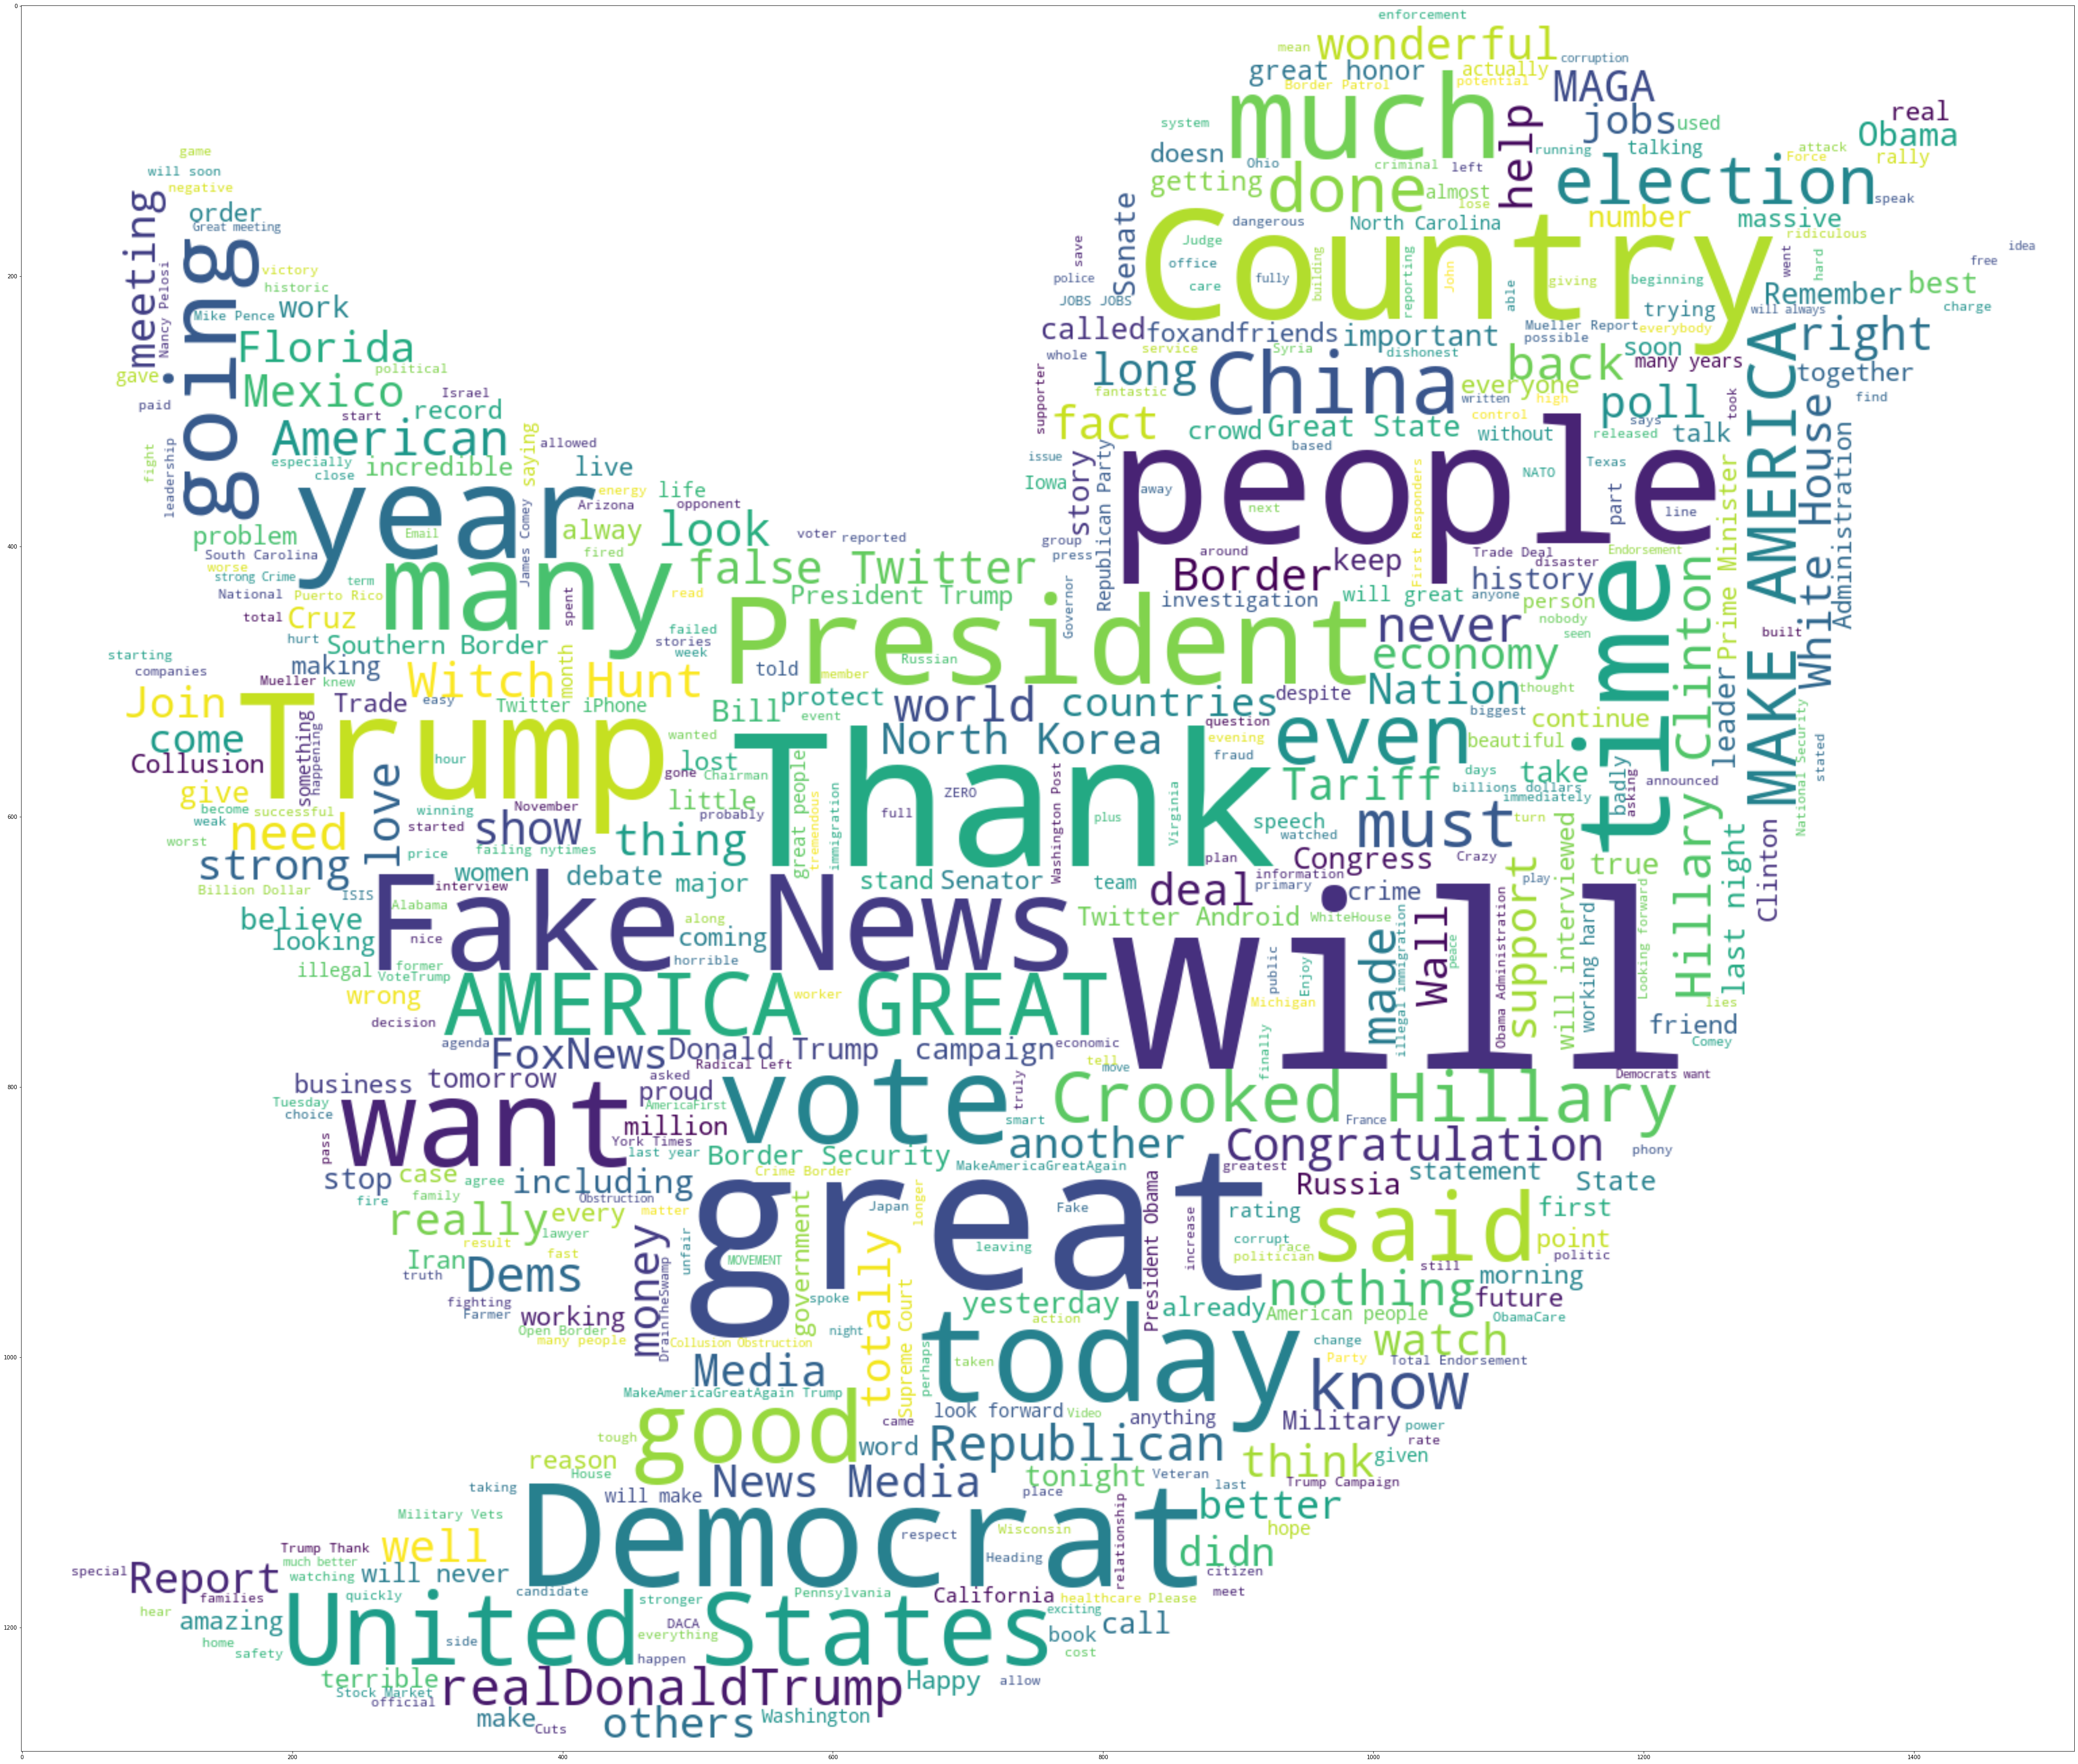

In [9]:
#plot wordcloud and save file
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
#plt.title('Twitter Generated Cloud', size=40)
#plt.axis("off")
plt.show()
wc.to_file("WordCloud4.png")